In [1]:
# ========================================
# Import all the library we love.

# It migh be a good idea to have all your import at the top
# to have everithing in the same place, it's cleaner.
# ========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

SEED = 43
np.random.seed(SEED)

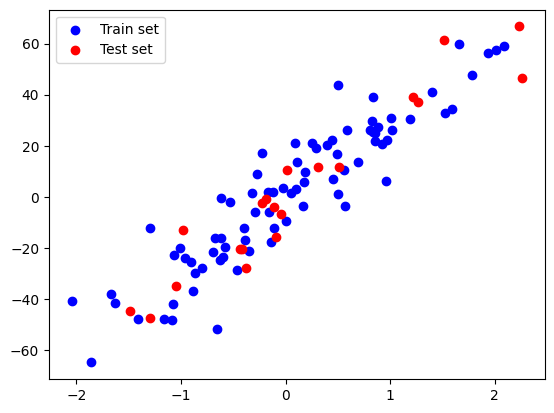

In [16]:
# ========================================
# Generate a random regression problem,
# with training and testing data,
# Visualiza the data.
# ========================================

# Explain what is
# x: ?
# y: ?
# n_feature: ?
# random_state: ?
x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=SEED)

# Create train and test set from the originale data
# Explain what is
# test_size: ?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

# Visualisation des Train set et Test set
plt.scatter(x_train, y_train, c='blue', label='Train set')
plt.scatter(x_test, y_test, c='red', label='Test set')
plt.legend()

RMSE: 93.2386463367156


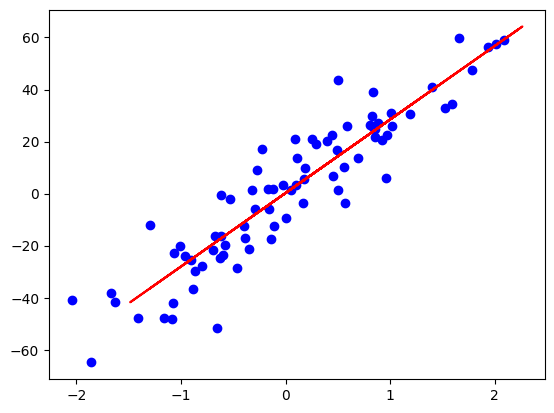

In [20]:
# ========================================
# Learn a regression model from the training data
# visualize the result
# Compute the RMSE
# ========================================

model = LinearRegression() # create a model
model.fit(x_train, y_train) # learn
y_hat = model.predict(x_test) # predict

plt.scatter(x_train, y_train, c='blue', label='Train set')
plt.plot(x_test, y_hat , c='red')

print('RMSE:', mean_squared_error(y_test, y_hat))

# Try cumputing the MSE with data genereted with more or less noise. What can you say ?


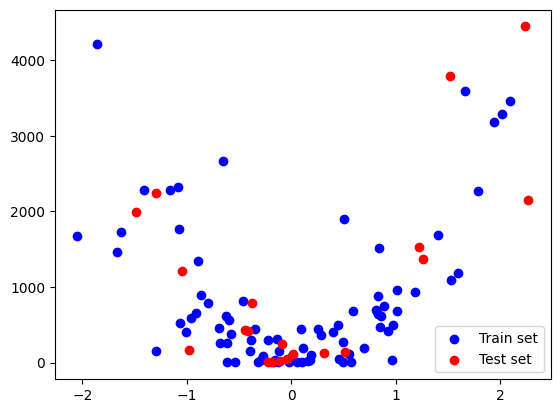

In [4]:
# ========================================
# Make it a bit more complexe: Add a bit of distorsion to the data
# visualize the result
# ========================================
x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=SEED)
y = y**2

# Create train and test set from the originale data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

# Visualisation des Train set et Test set
plt.scatter(x_train, y_train, c='blue', label='Train set')
plt.scatter(x_test, y_test, c='red', label='Test set')
plt.legend()

RMSE: 1524677.6969472438


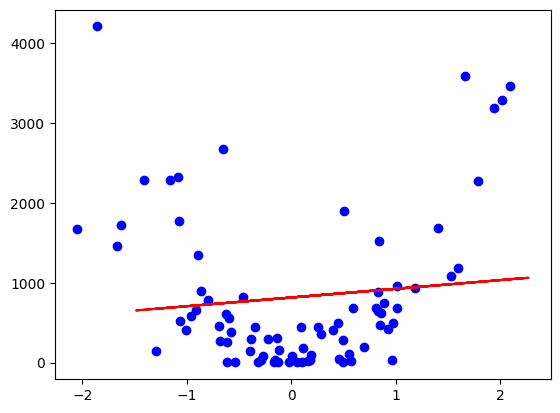

In [5]:
# ========================================
# Learn a regression model from the training data
# visualize the result
# ========================================

model = LinearRegression() # create a model
model.fit(x_train, y_train) # learn
y_hat = model.predict(x_test) # predict

plt.scatter(x_train, y_train, c='blue', label='Train set')
plt.plot(x_test, y_hat , c='red')

print('RMSE:', mean_squared_error(y_test, y_hat))

# Compare with the previous MSE \o>

RMSE: 456463.12172685424


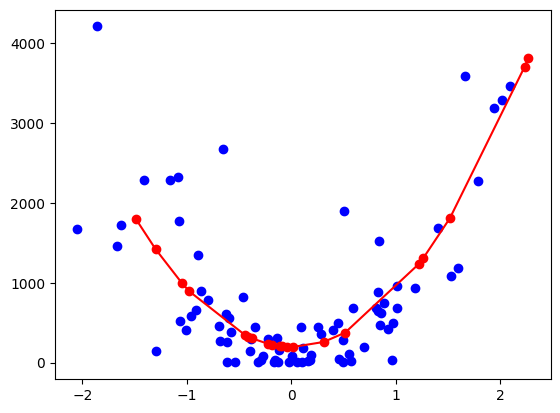

In [6]:
# ========================================
# Learn a regression model with a bit more of 
# complexity 
# ========================================

# Explain what is going here on this code.
# --


x_train_2 = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(x_train)
x_test_2 = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(x_test)

model = LinearRegression() # create a model
model.fit(x_train_2, y_train) # learn

y_hat = model.predict(x_test_2) # predict

plt.scatter(x_train, y_train, c='blue', label='Train set')
plt.scatter(x_test, y_hat, c='red')

# EXPLAIN WHY WE DO THAT ?
# --
sorted_indices = np.argsort(x_test.T[0])
plt.plot(x_test[sorted_indices], y_hat[sorted_indices], c="red")

print('RMSE:', mean_squared_error(y_test, y_hat))

# Compare with the previous MSE \o>

RMSE on test: 11588329480.85659
RMSE on train: 233676.66613737703


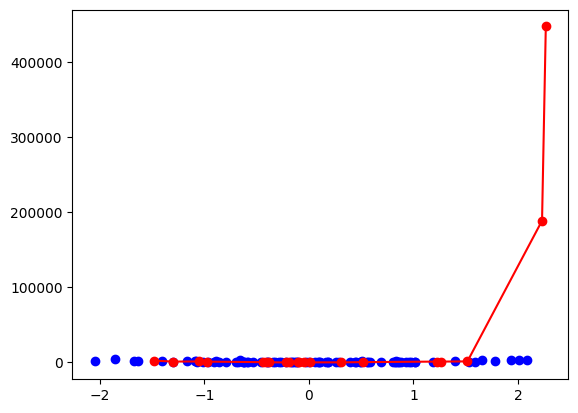

In [7]:
# ========================================
# Improving aggain by adding more complexity \o/
# 10 times better ?????? 
# ========================================

# Explain what is going here on this code.
# --


x_train_2 = PolynomialFeatures(degree = 20, include_bias=False).fit_transform(x_train)
x_test_2 = PolynomialFeatures(degree = 20, include_bias=False).fit_transform(x_test)

model = LinearRegression() # create a model
model.fit(x_train_2, y_train) # learn

y_hat = model.predict(x_test_2) # predict

plt.scatter(x_train, y_train, c='blue', label='Train set')
plt.scatter(x_test, y_hat, c='red')

# EXPLAIN WHY WE DO THAT ?
# --
sorted_indices = np.argsort(x_test.T[0])
plt.plot(x_test[sorted_indices], y_hat[sorted_indices], c="red")

print('RMSE on test:', mean_squared_error(y_test, y_hat))

y_hat_train = model.predict(x_train_2) # predict
print('RMSE on train:', mean_squared_error(y_train, y_hat_train))
# Compare with the previous MSE \o>

In [8]:
# This is what we called the bias-variance tradeoff !
# https://fr.wikipedia.org/wiki/Dilemme_biais-variance